# Bharat Intern
## Machine Learning Internship
### Task 3: Iris Flower Classification
#### Name : Suchitra D. Patil

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm

### Data Collection

In [2]:
iris_data = pd.read_csv("C:/Users/admin/Desktop/Internships/Bharat Intern/Iris (1).csv")

In [3]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_data.shape

(150, 6)

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Cleaning

In [9]:
iris_data = iris_data.drop(['Id'], axis = 1)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris_data.duplicated().sum()

3

In [11]:
iris_data.drop_duplicates(keep = 'first', inplace = True)
iris_data.duplicated().sum()

0

In [12]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

In [13]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

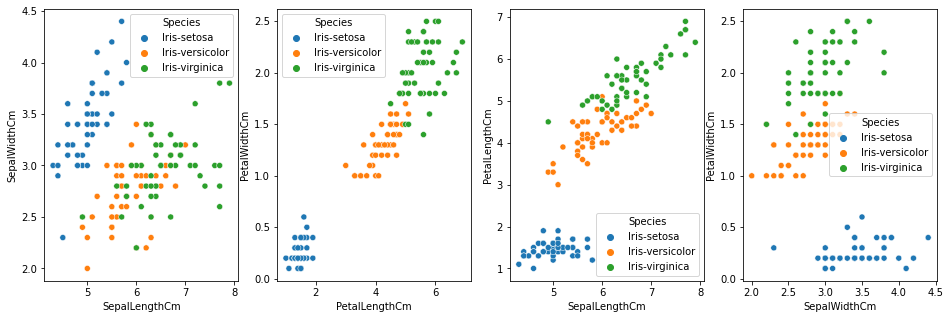

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,5))
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", hue = 'Species', data = iris_data, ax = ax1)
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue = 'Species', data = iris_data, ax = ax2)
sns.scatterplot(x = "SepalLengthCm", y = "PetalLengthCm", hue = 'Species', data = iris_data, ax = ax3)
sns.scatterplot(x = "SepalWidthCm", y = "PetalWidthCm", hue = 'Species', data = iris_data, ax = ax4)

<AxesSubplot:>

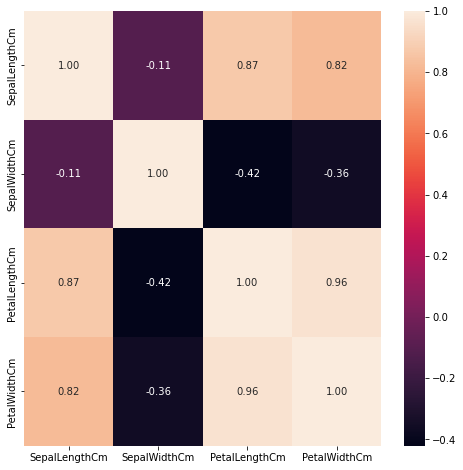

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(iris_data.corr(), annot = True, fmt = '.2f')

### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
iris_data['Species'] = le.fit_transform(iris_data['Species'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training 

In [19]:
x = iris_data.drop(['Species'], axis = 1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y = iris_data['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [22]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 2)

### Model 1 : Decision Tree Classifier

In [24]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
prediction_1 = dtc_model.predict(x_test)

In [26]:
print('Accuracy of the Decision tree model is: ', metrics.accuracy_score(prediction_1, y_test)*100)

Accuracy of the Decision tree model is:  96.66666666666667


### Model 2: SVM

In [27]:
svm_model = svm.SVC()

In [28]:
svm_model.fit(x_train, y_train)

SVC()

In [29]:
prediction_2 = svm_model.predict(x_test)

In [30]:
print('Accuracy of the SVM Model is: ', metrics.accuracy_score(prediction_2, y_test)*100)

Accuracy of the SVM Model is:  100.0
